## HW Set 5, Problem 1

Data set #4

Tom Solomon, April 2021 (modified from curve_fit_w_contour, Marty Ligare, August 2020)

In [1]:
import numpy as np
from scipy import optimize
from scipy import stats

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
# Following is an Ipython magic command that puts figures in notebook.
# make pdf-file with matplotlib inline and for jupyter notebook use matplotlib notebook
%matplotlib inline

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic') 
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

#### Define  functions

In [3]:
def f(x,m,b):
    '''Simple linear function with slope m and intercept b'''
    return x*m + b

def chi2(x, y, u, m, b):
    '''Chisquare as a function of data (x, y, and yerr=u), and model 
    parameters slope and intercept (m and b)'''
    return np.sum((y - f(x, m, b))**2/u**2)

### Linear fit to data for $m$ and $b$

#### Data to be fit:

In [4]:
# Or: data = np.loadtxt("file.dat")  
# Format:  [[x1,y1,u1], [x2,y2,u2], ... ]   where u1 is uncertainty in y1
data = np.array([[1, 3.17468, 0.5], [2, 1.52931, 0.4], [3, -0.93042, 0.6], [4, -2.37786, 0.5], \
                 [5,-5.17461, 0.4], [6, -6.29526, 0.6], [7, -10.18074, 0.5], [8, -12.4649, 0.5],\
                 [9, -15.45, 0.6],[10, -17.711, 0.5]])
x, y, u = data.T

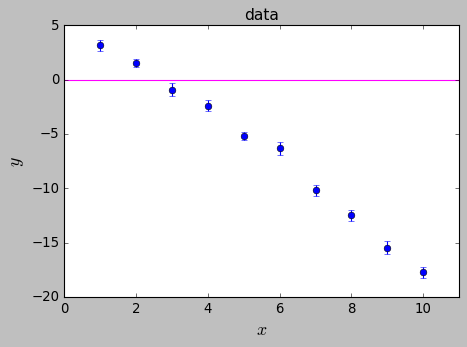

In [5]:
xc = np.linspace(0,11,201) # quasi-continuous set of x's for function plot
plt.figure()
plt.title("data",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0,color='magenta')
plt.xlim(0,11) 
plt.errorbar(x,y,yerr=u,fmt='o');

#### Perform fit

In [6]:
popt, pcov = optimize.curve_fit(f, x, y, sigma=u, absolute_sigma=True)

slope = popt[0]
alpha_m = np.sqrt(pcov[0,0])  # Std error in slope
intercept = popt[1]
alpha_b = np.sqrt(pcov[1,1])  # Std error in intercept

print("slope =", slope,"+/-", alpha_m,"\n")
print("intercept =", intercept,"+/-", alpha_b,"\n")

print("covariance matrix =","\n",pcov,"\n")
pcov_data = pcov

print("chi2 =", chi2(x, y, u,*popt))
# print("reduced chi2 = chi2/(len(x)-len(popt)) =", chi2(x, y, u, *popt)/(len(x)-len(popt)))

a = chi2(x,y,u,*popt)

slope = -2.3528108537690433 +/- 0.054854528937988985 

intercept = 6.3404795516679995 +/- 0.3270214119020709 

covariance matrix = 
 [[ 0.00300902 -0.0157513 ]
 [-0.0157513   0.106943  ]] 

chi2 = 13.39909982072839


### So, m = -2.35 $\pm$ 0.05 
### b = 6.3 $\pm$ 0.3

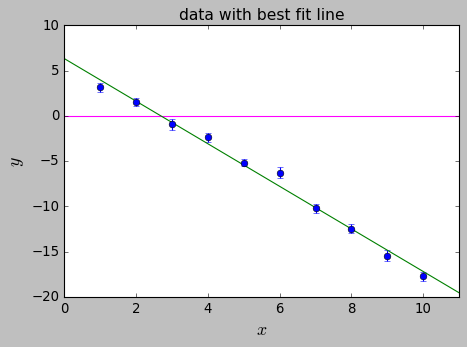

In [7]:
xc = np.linspace(0,11,201) # quasi-continuous set of x's function plot
plt.figure()
plt.title("data with best fit line",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0, color='magenta')
plt.xlim(0,11)  # Pad x-range on plot
plt.errorbar(x, y, yerr=u, fmt='o');
plt.plot(xc ,f(xc, slope, intercept));

#### Watch out here.  Everything may seem fine so far -- and this is absolutely the kind of fit that a lot of people will happily report in papers.  But if you can't see it from the plot above, look at what happens when you plot residuals.

#### Residuals:

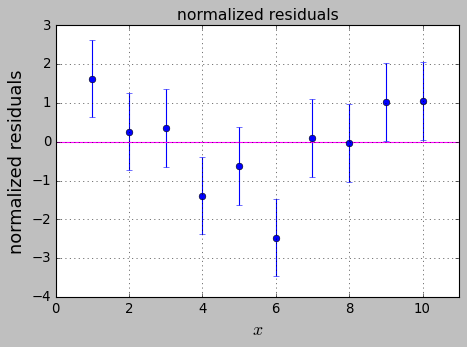

In [8]:
plt.figure()
plt.axhline(0,color='magenta')
plt.title('normalized residuals')
plt.xlabel('$x$')
plt.ylabel('normalized residuals')
plt.grid(True)
plt.errorbar(x,(f(x,slope,intercept)-y)/u,1,fmt='o')
plt.xlim(0,11);

### Plotted this way, the problem is easier to see.  The first three data points are high, then next three are low, and then they go high again.  In other words, there is a pattern to the residuals that should make a linear fit questionable.  A pattern like this suggests that a fit with a quadratic component (${ax}^2$) might be appropriate

### But notice that $\chi^2 = 13$, which is perfectly fine for a fit with 10 data points and 8 degrees of freedom.  So, it's hard to claim statistically that the linear model doesn't fit the data. The best you can say, I think, is that you should be suspicious of the linear model, and that you need more (or better) data. This is an example where simply looking at $\chi^2$ is insufficient.

### I'm not going to bother with the contour plot here -- it will work fine.  The issue with this fit isn't that.

#### Version information

+ %version_information is an IPython magic extension for showing version information for dependency modules in a notebook; 

+ See `https://github.com/jrjohansson/version_information`

+ `%version_information` is available on Bucknell computers on the linux network.  You can easily install it on
any computer.

In [9]:
%load_ext version_information

In [10]:
%version_information numpy, scipy, matplotlib

Software versions
Python 3.7.8 64bit [GCC 7.5.0]
IPython 7.17.0
OS Linux 3.10.0 1160.49.1.el7.x86_64 x86_64 with redhat 7.8 Maipo
numpy 1.19.1
scipy 1.5.0
matplotlib 3.3.0
Wed Mar 23 16:25:32 2022 EDT